In [1]:
from graphTools import *
from expTools import *
import os

In [2]:
#Dictionnaire avec les options de compilations d'apres commande
options={}
options["-k "] = ["mandel"]
options["-i "] = [5]
options["-v "] = ["omp"]
options["-s "] = [1024, 2048]
options["-of "] = ["./plots/data/fichier_perf.csv"] #Pour renseigner l'option '-of' il faut donner le chemin depuis le fichier easypap


#Dictionnaire avec les options OMP
ompenv = {}
ompenv["OMP_NUM_THREADS="]=[1] + list(range(4,9,4))
ompenv["OMP_PLACES="] =["cores","threads"]

nbrun = 2
#Lancement des experiences
execute('./run ', ompenv, options, nbrun, verbose = False)


Extraction des données :
    
* On peut **changer de fichier** de données en changeant l'adresse de celui-ci depuis le fichier easypap (format csv ou équivalent), et changer le séparateur (";" si c'est un ';' \t si c'est une tabulation, utiliser de préférence le ';')
    
* Il faut **renseigner les paramètres** de creerGraphique pour avoir le graphique que l'on souhaite. Chaque paramètre à une valeur par défaut, se référer à la description de la fonction creerGraphique pour plus de renseignements.
    
* Le calcul du **speedup** est automatisé grâce à la fonction creationRefSpeedUp. Elle est appelée dans la fonction creerGraphique. Pour pouvoir lancer cette fonction, il suffit donc uniquement de mettre 'speedup' dans le paramètre y. Ne pas appeler la fonction en dehors de creerGraphique.
    
* Pour calculer de **débit** par exemple, il suffiera simplement de décommenter la ligne :
<br>    df['debit'] = (df['dim'] ** 2) * df['iterations'] / df['time']
<br>    Cela va rajouter une colonne avec le débit.
    
* On peut **rajouter des colonnes** (à l'image du modèle du débit) afin de créer vos propres données.
    
* Attention, il ne faut **garder que les colonnes utiles** à la construction du graphe. Les autres sont déjà automatiquement supprimées, à vous donc de ne pas en rajouter (utiliser del df['NomDeColonne'] pour supprimer une colonne)

* Pour **séléctionner les lignes** à utiliser (ie. si on ne pas prendre en comptes les données où nbthreads = 1) on utilisera la commande suivante :
<br> df = df[(-df.NomDeColonne.isin([ListeDeDonnéeÀSupprimer]))].reset_index(drop = True)
<br> On pourra aussi superposer les conditions en les séparants par un '&' et faire l'action inverse (ie. ne garder que les valeurs en paramètre) en supprimant le '-' devant df.NomDeColonne.
<br> Exemple : si je veux supprimer les nbthreads = 1 et 4 ET je ne veux prendre que les données avec 50 ite, je vais utiliser la commande suivante : 
<br> df = df[(-df.threads.isin([1, 4])) & (df["iterations"].isin([50]))].reset_index(drop = True)
<br> Cette ligne sera à placer juste après le rajout de nouvelle colonne (s'il n'y a de rajout, on le mettera après l'ouverture).

2517180
10125610


graphTools.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.ref[(df.dim == i)] = valPerf.min()


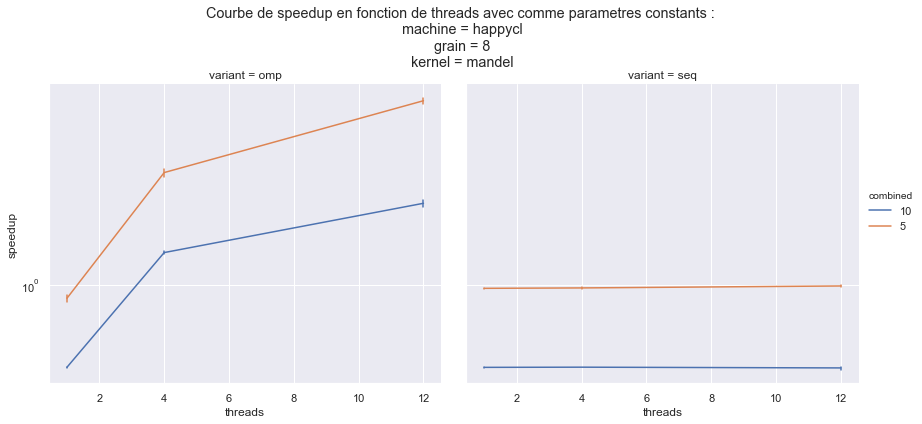

In [3]:
#Lecture du fichier d'experiences: 
df = openfile(path = "./plots/data/fichier_perf.csv", sepa=";")
#print(df)
        
#Rajout de colonne supplémentaire : 
#Pour calculer le débit, décommenter la ligne du dessous
#df['debit'] = (df['dim'] ** 2) * df['iterations'] / df['time']

#Séléction des lignes :
df = df[(-df.threads.isin([8])) & (df.kernel.isin(['mandel']))].reset_index(drop = True)

#Extraction des constantes :
constDico = {} #Permet de garder en mémoire les constantes, même après suppressions des colonnes
constStr = extractionConstante(constDico, df) #Utile pour afficher les constantes dans le titre

#Création du graphe : 
if (creerGraphique(df = df,
               constDico = constDico,
               constStr = constStr,
               x = 'threads',
               y = 'speedup',
               col = 'variant',
               row = None,
               plottype = 'lineplot',
               yscale = 'log') != 0) :

    plt.show()